# Linear Regression
## Geely Automotive Pricing Model
#####  By: Mihir Bramhane

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

-  Which variables are significant in predicting the price of a car
-  How well those variables describe the price of a car
<br>Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 
<br>**So interpretation is important!**
<br>Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Data
CarPrice_Assignment.csv : Contains all the relevent specification about the cars in the US market and their pricing .

-----------

 Let's Begin by importing all the required library packages !!

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importing packages for linear regression 

In [3]:
# module for performing test train split
from sklearn.model_selection import train_test_split

# Module for feture scaling
from sklearn.preprocessing import MinMaxScaler

# statmodel linear regression
import statsmodels.api as sm

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Reading the data

In [4]:
car_data = pd.read_csv('CarPrice_Assignment.csv')
# Check the head of the dataset
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the car dataframe

In [5]:
car_data.shape

(205, 26)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Let's do a sanity check on the dataframe for missing values.

In [8]:
# percentage of missing values in each column
round(car_data.isnull().sum()/len(car_data.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

Awsome! the data at hand is clean of any missing values. This is always a good thing.

In [8]:
# Dropping Duplicates if any
car_data=car_data.drop_duplicates()

In [9]:
#we can drop the car_ID variable which is not relevent for the price modeling
car_data.drop('car_ID',axis=1,inplace=True)

##### Custom Function Definations For Plotting

In [10]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [11]:
def plot_percentages(dataframe, var_list, sortbyindex=False):
# Plot the percentage of car's in the US market with respect to different car features
    plt.figure(figsize=(20, 17))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(var, fontsize=10)
        showLabels(ax)

In [12]:
def plot_cat(var_list):
#Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = car_data)
    plt.show()

In [13]:
def plot_dist(var_list):
#Function to plot the distribution plot of the numeric variable list
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,5,var_list.index(var)+1)
        
    plt.show()

##### Custom Function Definations For model fitting

In [14]:
def fit_LRM(X_train):
#Function to fit the linear regression model from the statmodel package
# Creating X_train dataframe with the selected variables
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [15]:
def getVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

## Data Analysis

### Data Understanding and Correction

Visualising the Data

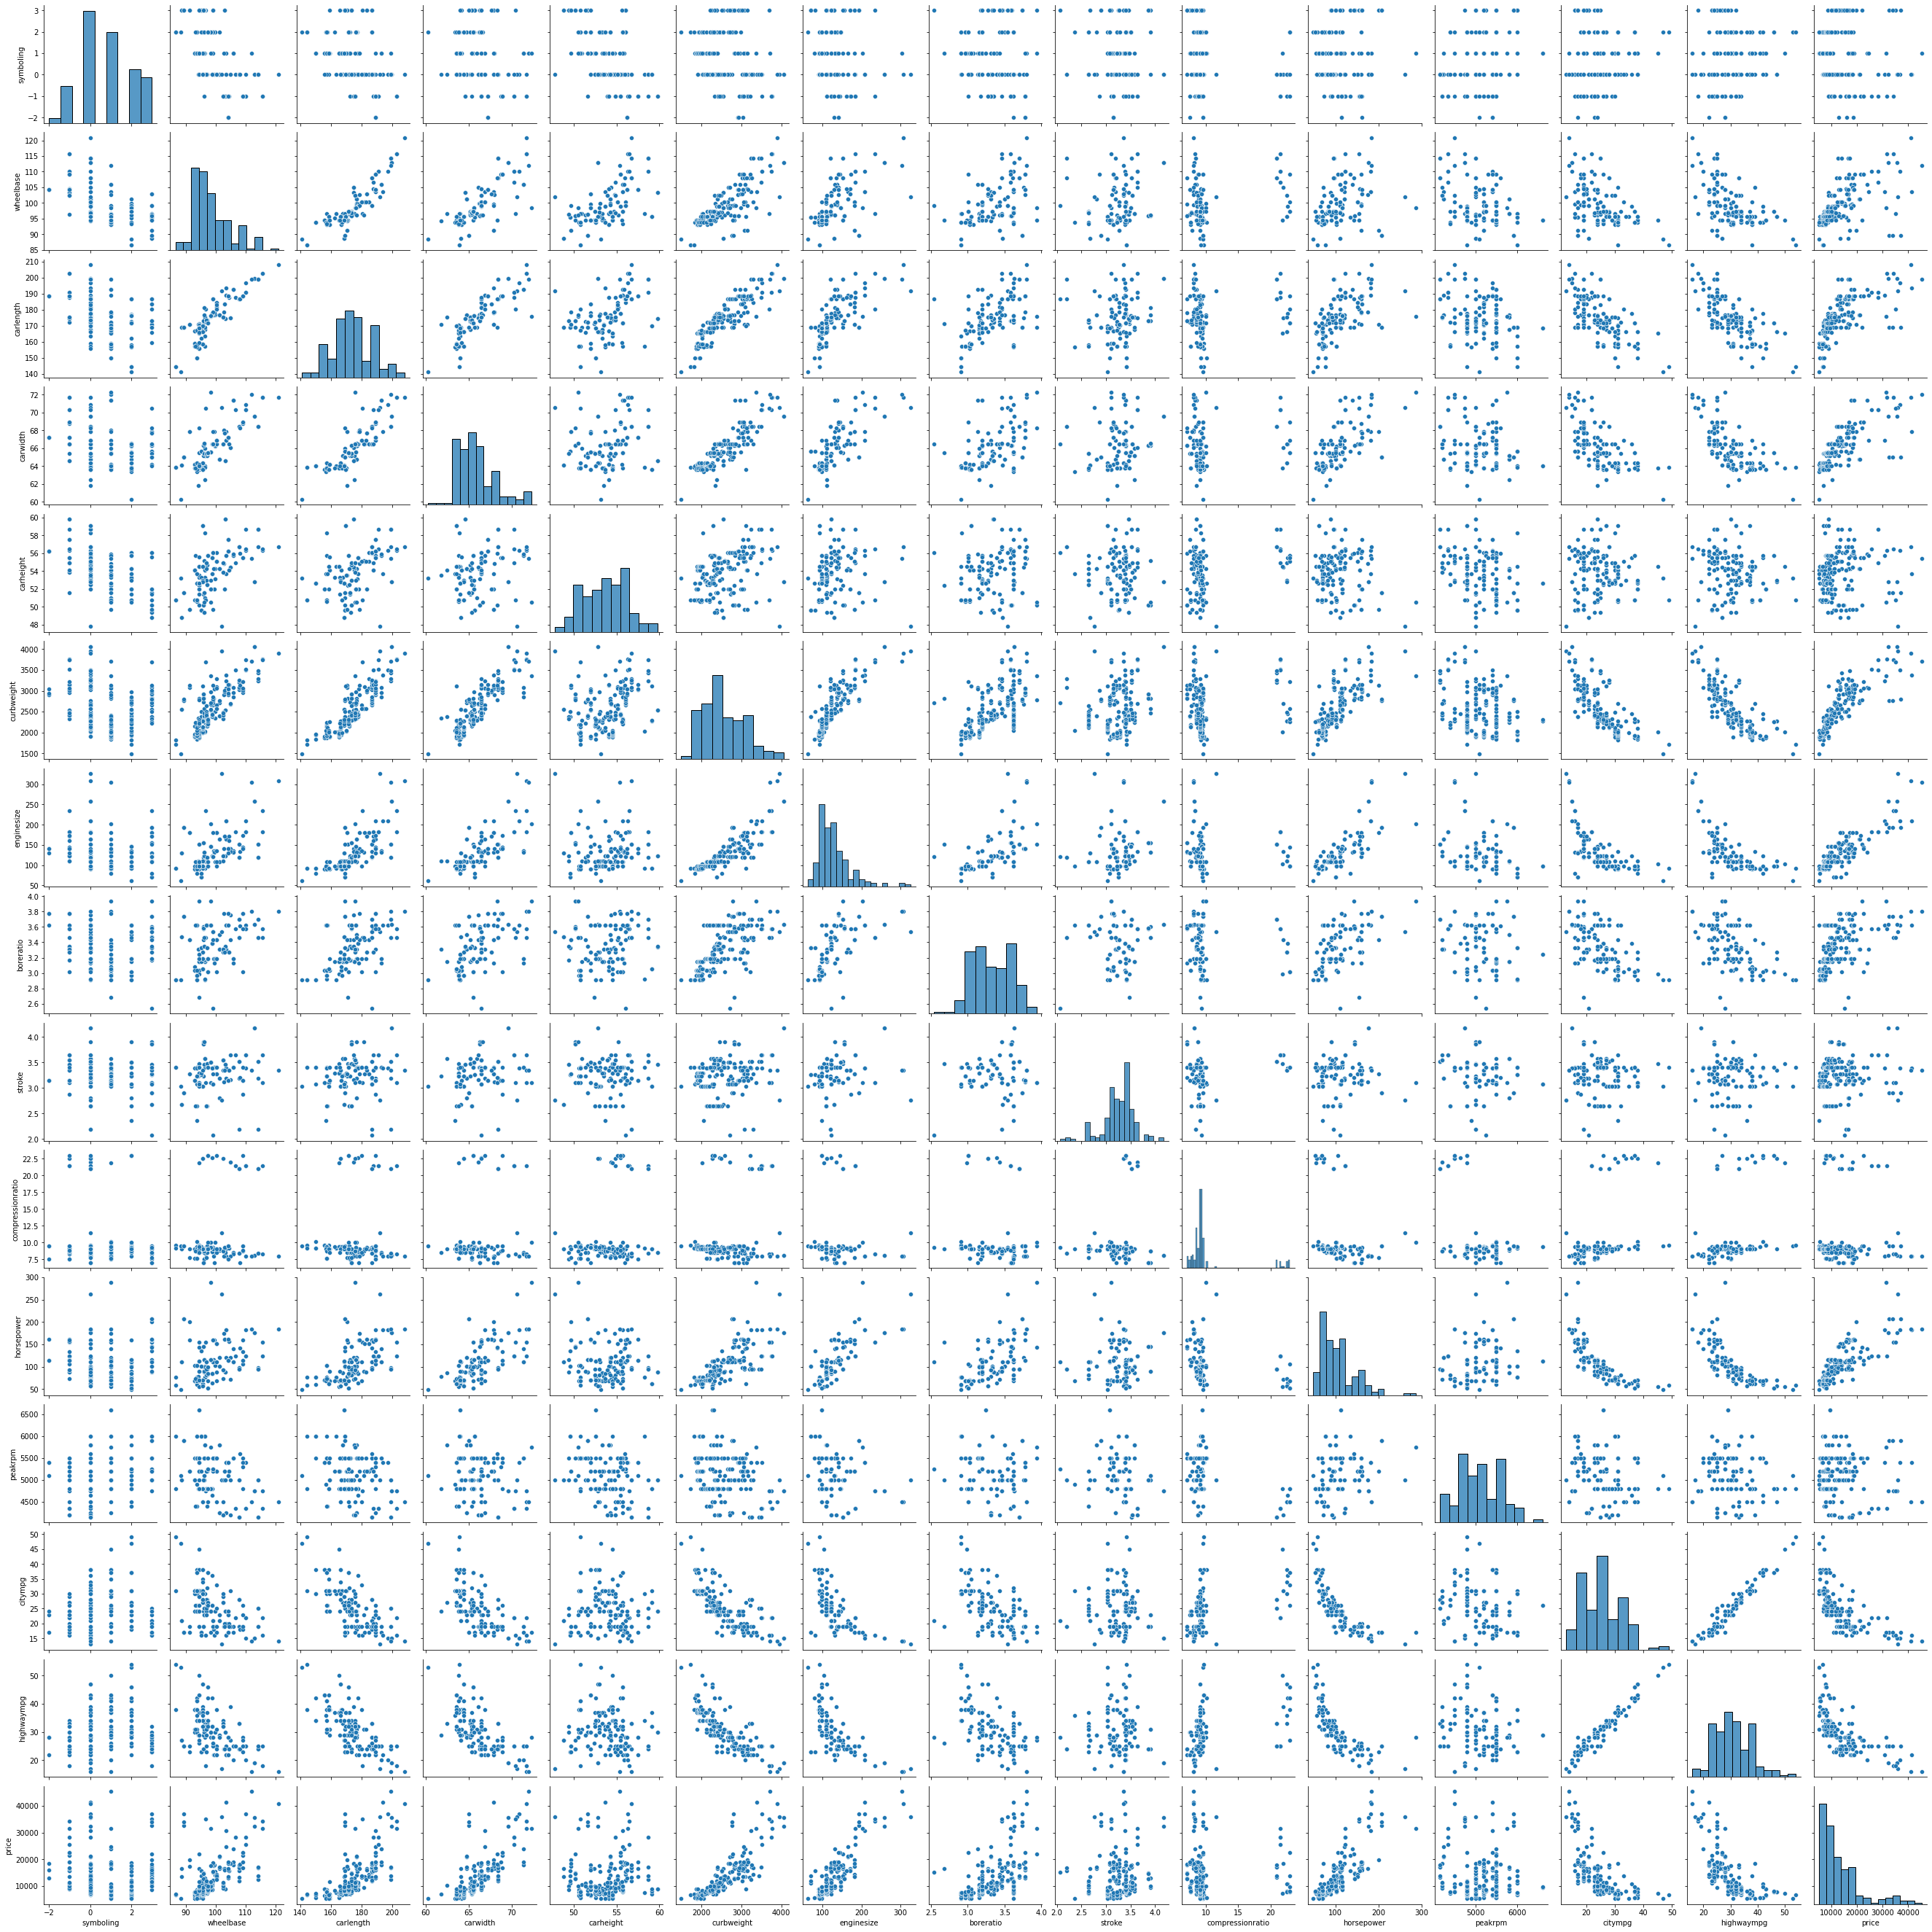

In [16]:
sns.pairplot(car_data)
plt.show()

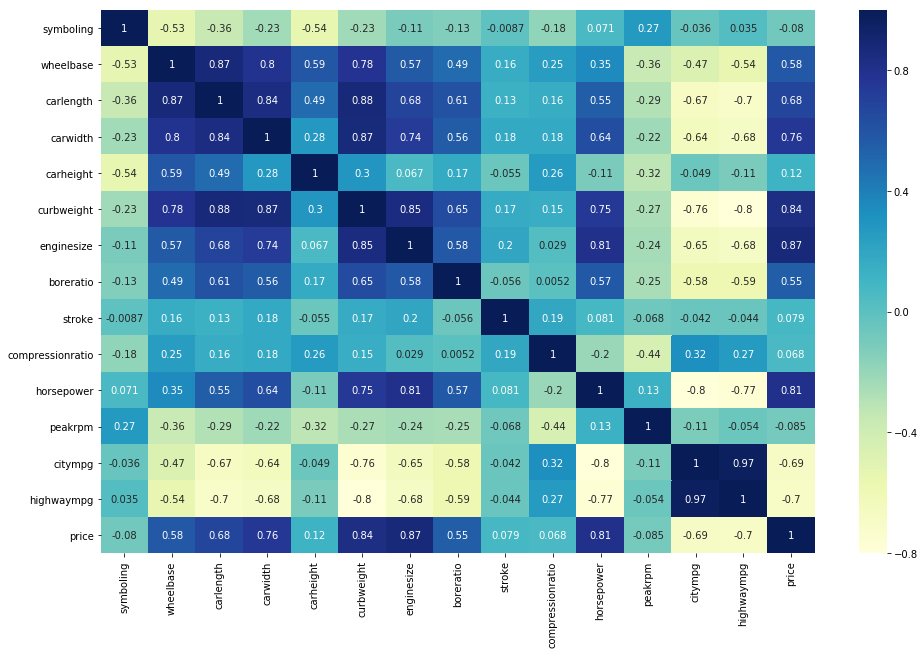

In [18]:
plt.figure(figsize = (16, 10))
cor=car_data.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

From this, we can have a general sense of which features are related to price. We can spot some features which has some kind of positive relationships going on with the dependent price variable like,
-  wheelbase,
-  carlength,
-  carwidth,
-  curbweight,
-  enginesize,
-  boreratio,
-  horsepower.<br>
However, there are also a few variables showing a negative relationship with price variable like,
-  citympg,
-  highwaympg.
<br>
<br>We will further explore these. For now we know there is some relationship going on with the price variable.


In [17]:
car_data['symboling'] = car_data['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

The categorical variable **CarName** is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name as the independent variable for model building. 

In [18]:
car_data['car_company'] = car_data['CarName'].apply(lambda x: x.split( )[0])
car_data.drop('CarName',axis=1,inplace=True)

In [19]:
car_data['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Here, we observe that there are multiple company name being **misspelled**. lets correct this in the data.

In [20]:
# Correcting the misspelled company names.
car_data['car_company'].replace('maxda','mazda',inplace=True)
car_data['car_company'].replace('Nissan','nissan',inplace=True)
car_data['car_company'].replace('porcshce','porsche',inplace=True)
car_data['car_company'].replace('toyouta','toyota',inplace=True)
car_data['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [21]:
categorical_variables = list(car_data.columns[car_data.dtypes == 'object'])
categorical_variables

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company']

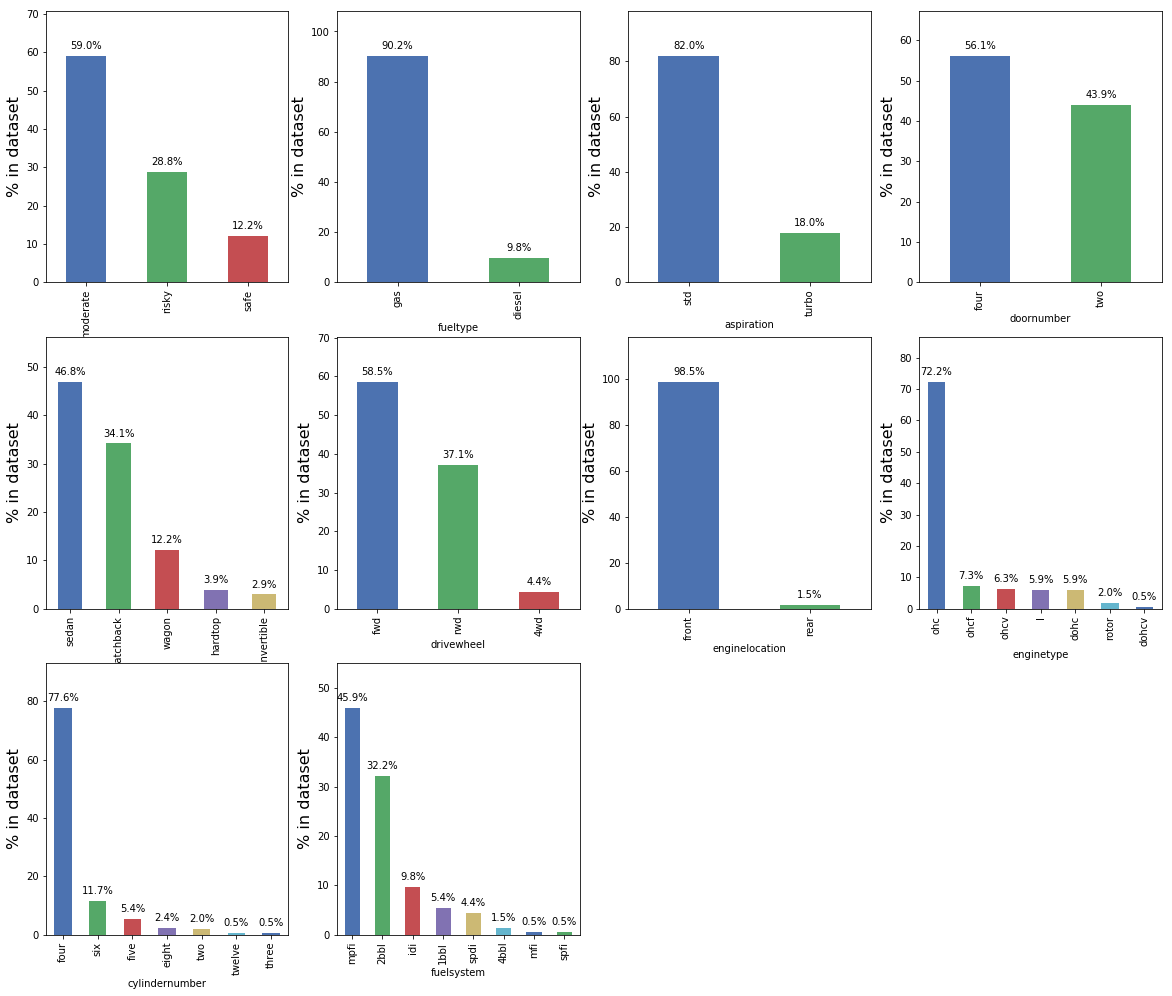

In [24]:
# market percentage of car's with respect to features
plot_percentages(car_data,categorical_variables[:-1])

We can identify the some of the car **features that are predominant** in the US Automobile Market, Geely Automotives can consider these facts to full fill the market dominant needs and make the needed changes to their manufacturing line.
These features are:
-  **symboling:** moderate (0,1)
-  **Carbody:** Sedan
-  **fueltype:** gas
-  **aspiration:** standard
-  **doornumbers:** four
-  **drivewheel:** forward
-  **engine location:** front
-  **engine type:** ohc
-  **cylinderNumber:** four
-  **fuelSystem**: mpfi


Lets see the most popular Automobile company in the US Automobile Market

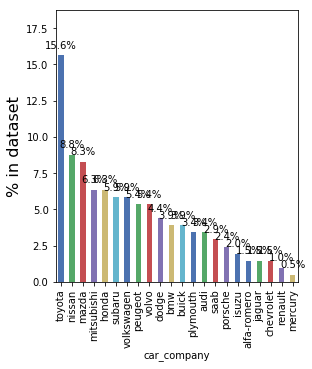

In [25]:
plot_percentages(car_data,[categorical_variables[-1]])

-  Toyota clearly has a dominant market percentage in the US of 15.6%.
<br> This is followed by:
-  Nissan with 8.8%
-  Mazda with 8.2%
-  Mitsubishi and Honda are equally popular with 6.3% market percentage.

Let's see how these categorical variables relate one-to-one with the outcome variable price.

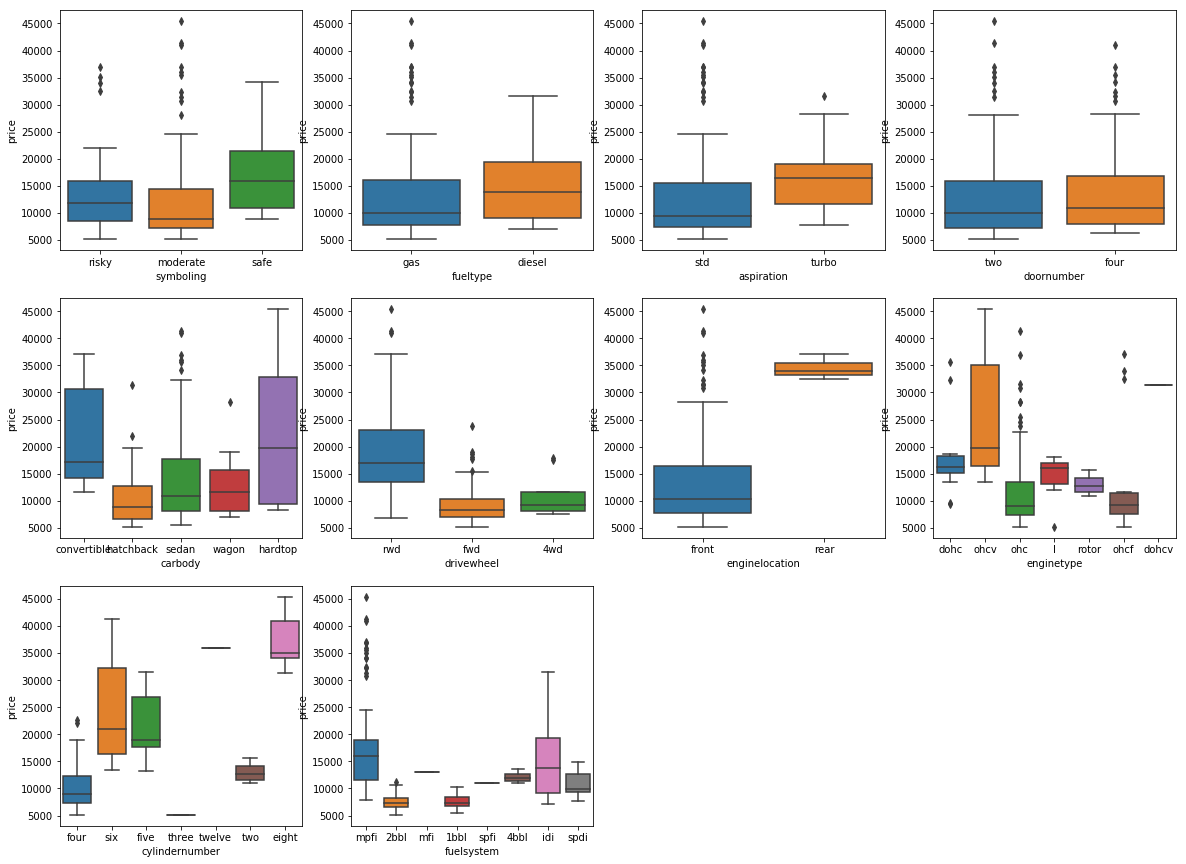

In [26]:
# ploting all variables excluding car_company against the output variable
plot_cat(categorical_variables[:-1]) 

**Observations:**   <br>
-  Although not significant but still the fuel type seems have an effect on the pricing of the cars. Let's confirm this later.
-  enginelocation and aspiration surly has a visible affect on the pricing of the car
- The price of real wheel drive is significantly higher that other drivewheel options.
- cylindernumber and engine type also seem to regulate the price of cars.
- hardtop and convertables cars are definatly priced higher than other body types available. Tells us that variable carbody is contributing in determinig the price.

Let's see how the prices vary with the different automobile companies in the US market

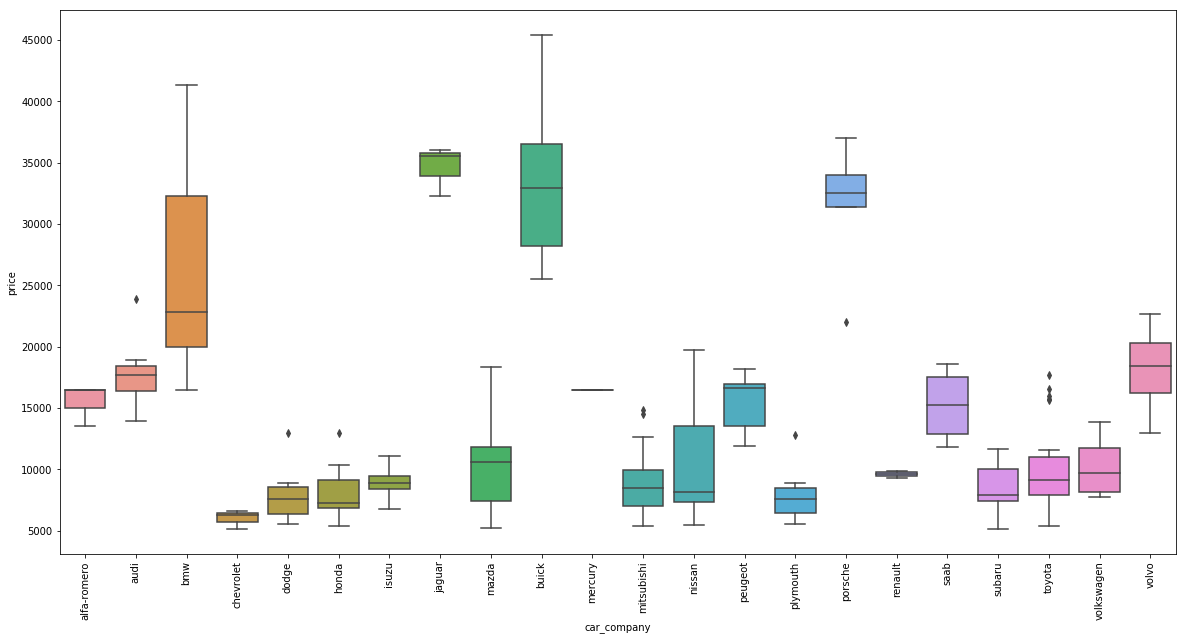

Average US car price:  13276.710570731706
car_company
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x = categorical_variables[-1], y = 'price', data = car_data)
plt.xticks(rotation=90)
plt.show()
print('Average US car price: ',car_data['price'].mean())
print(car_data.groupby('car_company').price.mean().sort_values(ascending=False).head())

**Observation:**
-  Each company has a range in which the cars are priced. There are few outilers for these companies showing that they do manufacture some expensive cars which are priced above their usual market pricing range.
-  Cars manufacturers like jaguar, Buick, Porsche, BMW, Volo are clearly on the high end side, priced well above the average US cars price which is approx. $13,000.
-  company name shows some affect on the price determination.

We can also see how multiple categorical variables together affect the pricing of cars.

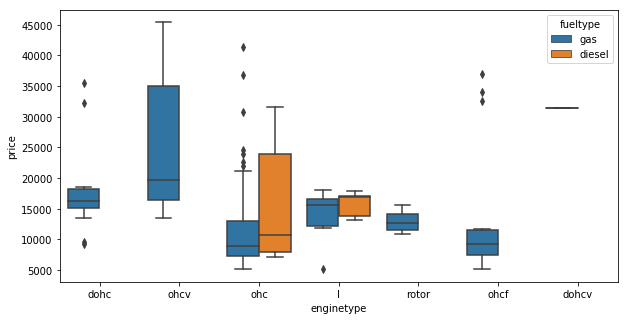

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=car_data)
plt.show()

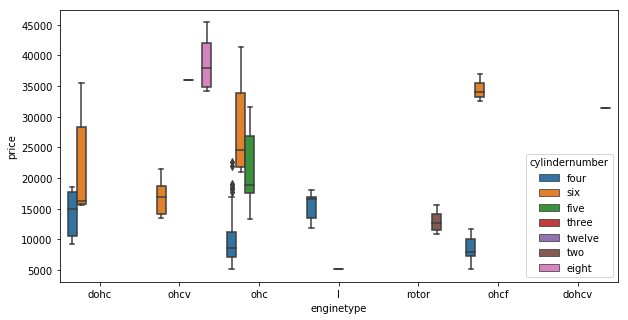

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'cylindernumber', data=car_data)
plt.show()

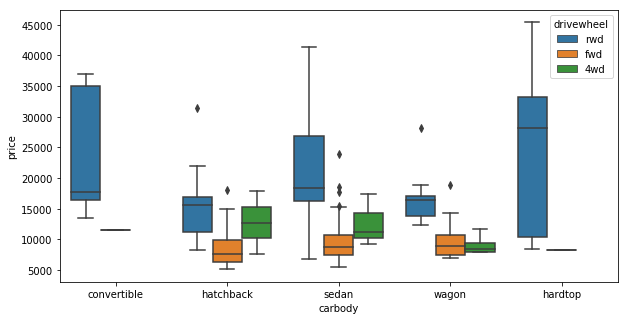

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='carbody', y='price', hue = 'drivewheel', data=car_data)
plt.show()

### Outlier treatment

Linear Regression, which is highly sensitive to outliers it is important that we treat the outliers before modeling.

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


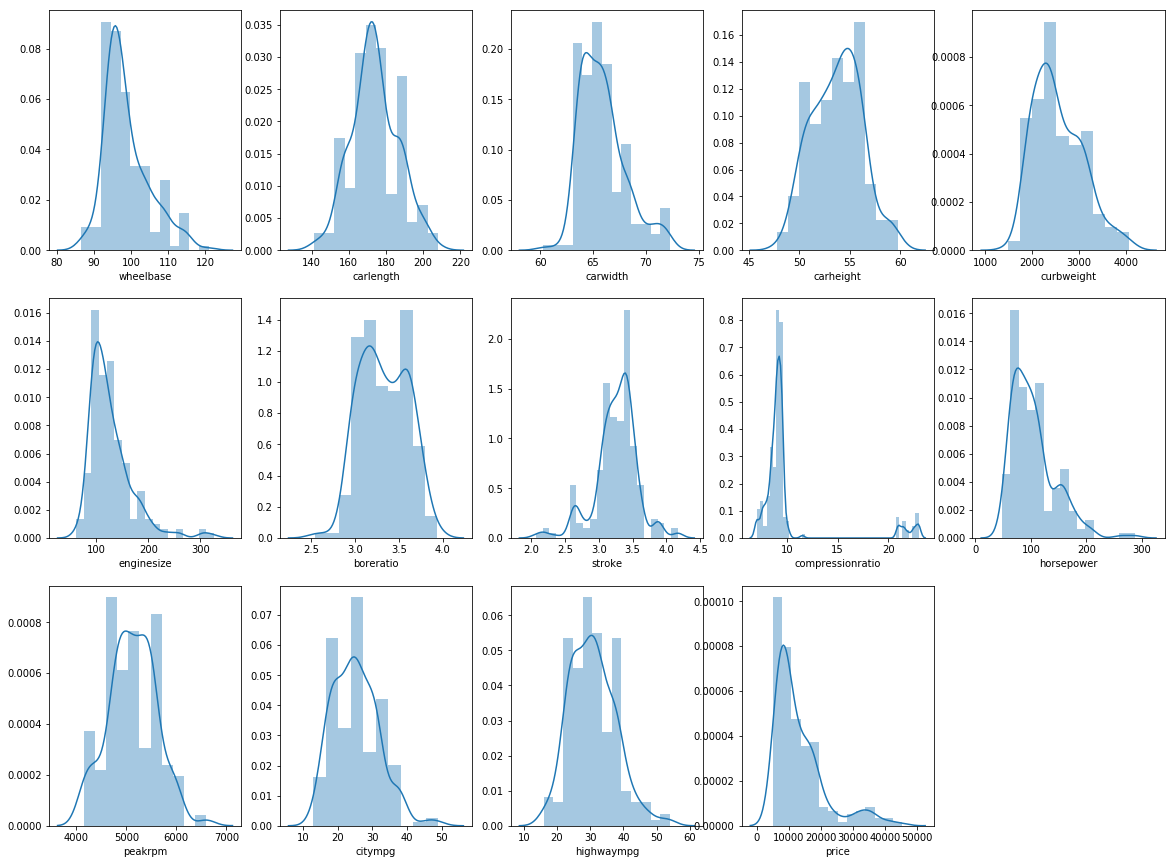

In [31]:
numeric_variables = list(car_data.columns[car_data.dtypes != 'object'])
print(numeric_variables)
plot_dist(numeric_variables)

We see enginesize, horsepower and compression ratio variables to have a right skewed distribution, this is probably due to outliers in the variable.

In [32]:
print(car_data[['horsepower','curbweight','enginesize']].quantile([0.01, .96]))
print(car_data[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.96      182.00     3657.80       209.0
      compressionratio
0.01              7.00
0.90             10.94


We decide to treat the outliers by clipping the variables curbweight','horsepower','enginesize' at 96 precentile value. And clip compressionratio at 90 percentile value

In [33]:
# Outilers in price of cars
car_data['horsepower'][np.abs(car_data['horsepower'] > 182.00)]= 182.00
car_data['horsepower'][np.abs(car_data['horsepower'] > 3657.80)]= 3657.80
car_data['enginesize'][np.abs(car_data['enginesize'] > 209.00)]= 209.00
car_data['compressionratio'][np.abs(car_data['compressionratio'] > 10.94)]= 10.94

Lets keep car data for which the price is less than 3 standard deviation.

In [34]:
 car_data= car_data[np.abs(car_data.price-car_data.price.mean()) <= (3*car_data.price.std())]

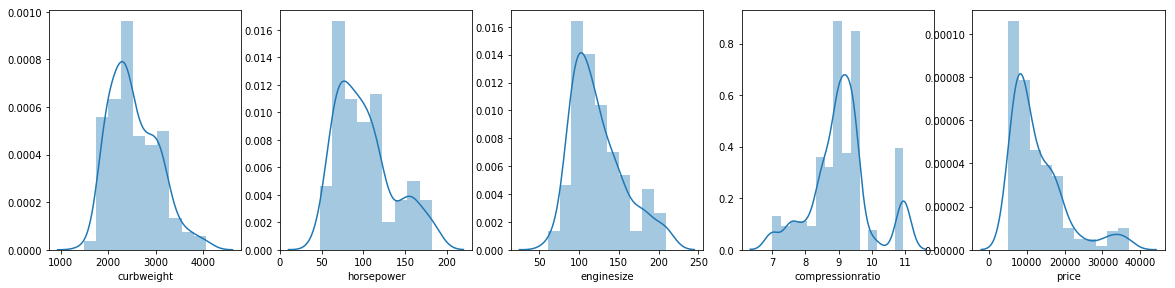

In [35]:
plot_dist(['curbweight','horsepower','enginesize','compressionratio','price'])

#### Creating new variables
This will be helpful to remove corelated variables.

Earlier, from the scatter plot and the heatmap, we noticed there is a high correlation between carlength, wheelbase, car width, car weight and city/highway mpg's. Lets create new variables from these to try reducing the multicolinearlity.

In [36]:
# Creating new variable carLWratio
car_data['carLWratio'] = car_data.carlength/car_data.carwidth
# Creating new variable carWHratio
car_data['carWHratio'] = car_data.carwidth/car_data.carheight
# Creating new variable PWratio
car_data['PWratio'] = car_data.horsepower/car_data.curbweight
# Creating new variable HCmpgratio
car_data['HCmpgratio'] = car_data.highwaympg/car_data.citympg
## droping the orignal variables
car_data.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

Since we saw that the company brand value also is determinig the pricing of the car. Let's create a company_segment categorical variable which would suggest, under which segment tier does the car_company comes under.<br>
We will segment the car companies based on the mean company price as 
-  __lowtier__ if company mean price is below 10,000
-  __midtier__ if company mean price is above 10,000 and below 20,000
-  __hightier__ if company mean price is above 20,000

In [37]:
car_data.groupby('car_company').price.mean().sort_values(ascending=False)

car_company
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [38]:
company_segment_dict = {
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
car_data['company_segment'] = car_data['car_company'].map(company_segment_dict)
# Dropping the orignal car_company variable
car_data.drop('car_company',axis=1,inplace=True)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment
0,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,moderate,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,risky,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,risky,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


In [39]:
car_data.groupby('company_segment').price.mean()

company_segment
hightier    29107.309524
lowtier      8987.369565
midtier     13231.839151
Name: price, dtype: float64

#### Handeling Categorical Variable for Linear Regression

In [40]:
# Converting categorical variables with two levels to either 1 or 0
car_data['fueltype'] = car_data['fueltype'].map({'gas': 1, 'diesel': 0})
car_data['aspiration'] = car_data['aspiration'].map({'std': 1, 'turbo': 0})
car_data['doornumber'] = car_data['doornumber'].map({'two': 1, 'four': 0})
car_data['enginelocation'] = car_data['enginelocation'].map({'front': 1, 'rear': 0})
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment
0,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,risky,1,1,1,convertible,rwd,1,88.6,2548,dohc,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,moderate,1,1,1,hatchback,rwd,1,94.5,2823,ohcv,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,risky,1,1,0,sedan,fwd,1,99.8,2337,ohc,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,risky,1,1,0,sedan,4wd,1,99.4,2824,ohc,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


In [41]:
# Creating dummy variables
df = pd.get_dummies(car_data)
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature 
df.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'company_segment_lowtier'],axis=1,inplace=True)
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'carLWratio', 'carWHratio', 'PWratio',
       'HCmpgratio', 'symboling_moderate', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_segment_hightier', 'company_segment_midtier'],
      dtype='object')

#### Test Train Split

In [42]:
from sklearn.model_selection import train_test_split

# Splitting the avilable data into training and testing set.

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Feature scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [44]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_midtier
1,1,1,1,1,0.068966,0.411171,0.466216,0.664286,0.290476,0.507614,...,0,0,0,0,0,1,0,0,0,1
165,1,1,1,1,0.272414,0.301396,0.250000,0.500000,0.480952,0.609137,...,0,0,0,0,0,1,0,0,0,0
197,1,1,0,1,0.610345,0.602793,0.540541,0.885714,0.514286,0.634518,...,0,0,0,0,0,1,0,0,0,1
169,1,1,1,1,0.406897,0.412335,0.574324,0.771429,0.680952,0.583756,...,0,0,0,0,0,1,0,0,0,0
190,1,1,1,1,0.272414,0.284329,0.324324,0.464286,0.633333,0.380711,...,0,0,0,0,0,1,0,0,0,1


In [45]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_midtier
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.886525,0.794326,0.439716,0.985816,0.413402,0.411779,0.420979,0.559980,0.551570,0.536415,...,0.028369,0.333333,0.021277,0.113475,0.0,0.425532,0.042553,0.007092,0.106383,0.468085
std,0.318304,0.405634,0.498122,0.118672,0.198892,0.198452,0.225970,0.192528,0.150278,0.229812,...,0.166616,0.473085,0.144819,0.318304,0.0,0.496186,0.202567,0.084215,0.309426,0.500759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.254849,0.243243,0.421429,0.490476,0.406091,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.358621,0.359193,0.337838,0.550000,0.571429,0.507614,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.552366,0.540541,0.742857,0.633333,0.609137,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [46]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

We will be using a mix approach. Initially using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn) and then using the Statmodel for statistics analysis of the model

### RFE
Recursive feature elimination

In [47]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 15),
 ('aspiration', False, 9),
 ('doornumber', False, 24),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', False, 30),
 ('enginesize', False, 8),
 ('boreratio', False, 6),
 ('stroke', True, 1),
 ('compressionratio', False, 11),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('carLWratio', True, 1),
 ('carWHratio', True, 1),
 ('PWratio', True, 1),
 ('HCmpgratio', False, 22),
 ('symboling_moderate', False, 28),
 ('symboling_safe', False, 27),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 21),
 ('carbody_sedan', False, 17),
 ('carbody_wagon', False, 25),
 ('drivewheel_fwd', False, 29),
 ('drivewheel_rwd', False, 26),
 ('enginetype_dohc', False, 3),
 ('enginetype_dohcv', False, 2),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 4),
 ('enginetype_ohcv', False, 12),
 ('enginetype_rotor', False, 16),
 ('cylindernumber_eight', False, 13),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylinder

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'stroke', 'horsepower', 'peakrpm',
       'carLWratio', 'carWHratio', 'PWratio', 'carbody_convertible',
       'enginetype_ohc', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_4bbl', 'company_segment_hightier'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'curbweight', 'enginesize',
       'boreratio', 'compressionratio', 'HCmpgratio', 'symboling_moderate',
       'symboling_safe', 'carbody_hardtop', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'company_segment_midtier'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
lm=fit_LRM(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           6.66e-76
Time:                        20:19:14   Log-Likelihood:                 225.25
No. Observations:                 141   AIC:                            -418.5
Df Residuals:                     125   BIC:                            -371.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- fuelsystem_4bbl has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.

In [54]:
X_train1 = X_train_rfe.drop('fuelsystem_4bbl', axis=1)

In [55]:
lm1=fit_LRM(X_train1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     184.9
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           8.94e-77
Time:                        20:19:14   Log-Likelihood:                 224.55
No. Observations:                 141   AIC:                            -419.1
Df Residuals:                     126   BIC:                            -374.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- cylindernumber_five has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.

In [56]:
X_train2 = X_train1.drop('cylindernumber_five', axis=1)

In [57]:
lm2=fit_LRM(X_train2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.28e-77
Time:                        20:19:14   Log-Likelihood:                 223.74
No. Observations:                 141   AIC:                            -419.5
Df Residuals:                     127   BIC:                            -378.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- cylindernumber_six has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.

In [58]:
X_train3 = X_train2.drop('cylindernumber_six', axis=1)

In [59]:
lm3=fit_LRM(X_train3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     215.5
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.14e-78
Time:                        20:19:14   Log-Likelihood:                 223.41
No. Observations:                 141   AIC:                            -420.8
Df Residuals:                     128   BIC:                            -382.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

-  carLWratio is having a high VIF and is highly correlated to wheelbase and slightly with horsepower. Let's remove this.

In [60]:
X_train4 = X_train3.drop('carLWratio', axis=1)

In [61]:
lm4=fit_LRM(X_train4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     231.6
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.88e-79
Time:                        20:19:14   Log-Likelihood:                 221.89
No. Observations:                 141   AIC:                            -419.8
Df Residuals:                     129   BIC:                            -384.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [62]:
getVIF(X_train4)

,Features,VIF
6,PWratio,64.08
3,horsepower,51.53
0,enginelocation,44.23
2,stroke,20.76
1,wheelbase,19.57
5,carWHratio,13.32
4,peakrpm,8.18
9,cylindernumber_four,8.00
8,enginetype_ohc,5.81
10,company_segment_hightier,1.90


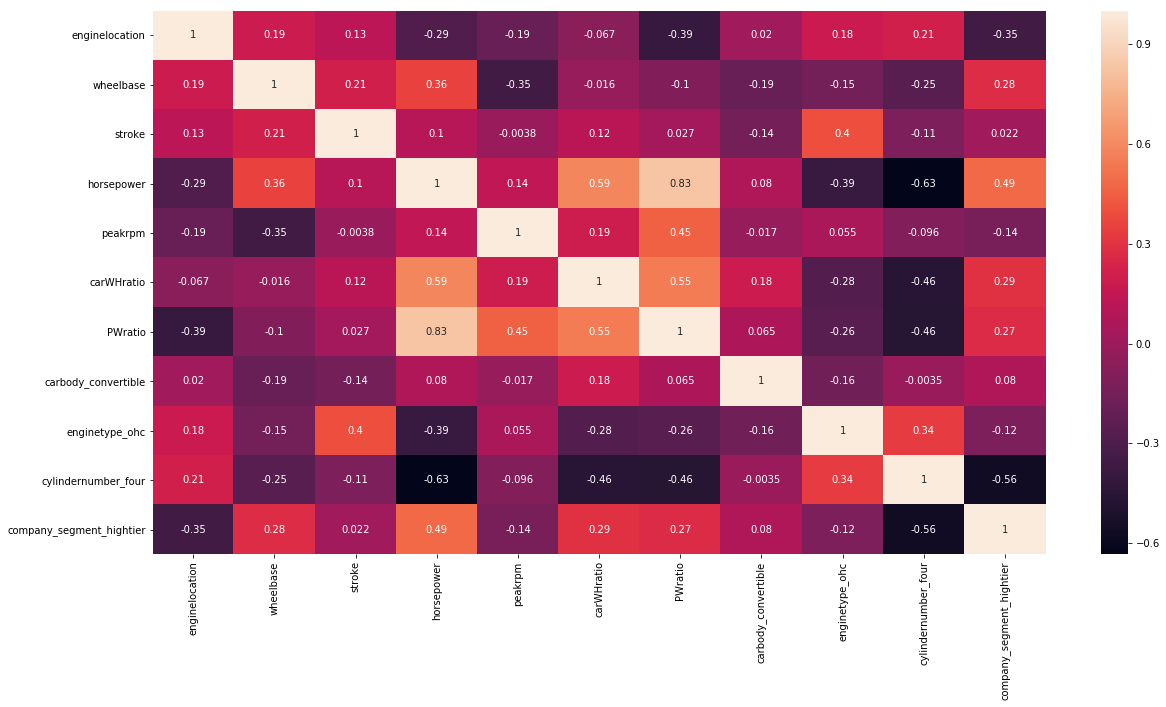

In [63]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train4.corr(),annot = True)

-  removing carLWratio had no impact on the Adj. R-Squared.
- PWratio is having the highest VIF and is strongly corelated with horsepower, carWHratio and peakrpm. Let's remove this

In [64]:
X_train5 = X_train4.drop('PWratio', axis=1)

In [65]:
lm5=fit_LRM(X_train5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     175.7
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.00e-70
Time:                        20:19:15   Log-Likelihood:                 196.68
No. Observations:                 141   AIC:                            -371.4
Df Residuals:                     130   BIC:                            -338.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [66]:
getVIF(X_train5)

,Features,VIF
0,enginelocation,38.13
2,stroke,20.64
5,carWHratio,13.21
1,wheelbase,10.90
3,horsepower,9.91
8,cylindernumber_four,7.29
4,peakrpm,6.08
7,enginetype_ohc,5.80
9,company_segment_hightier,1.90
6,carbody_convertible,1.20


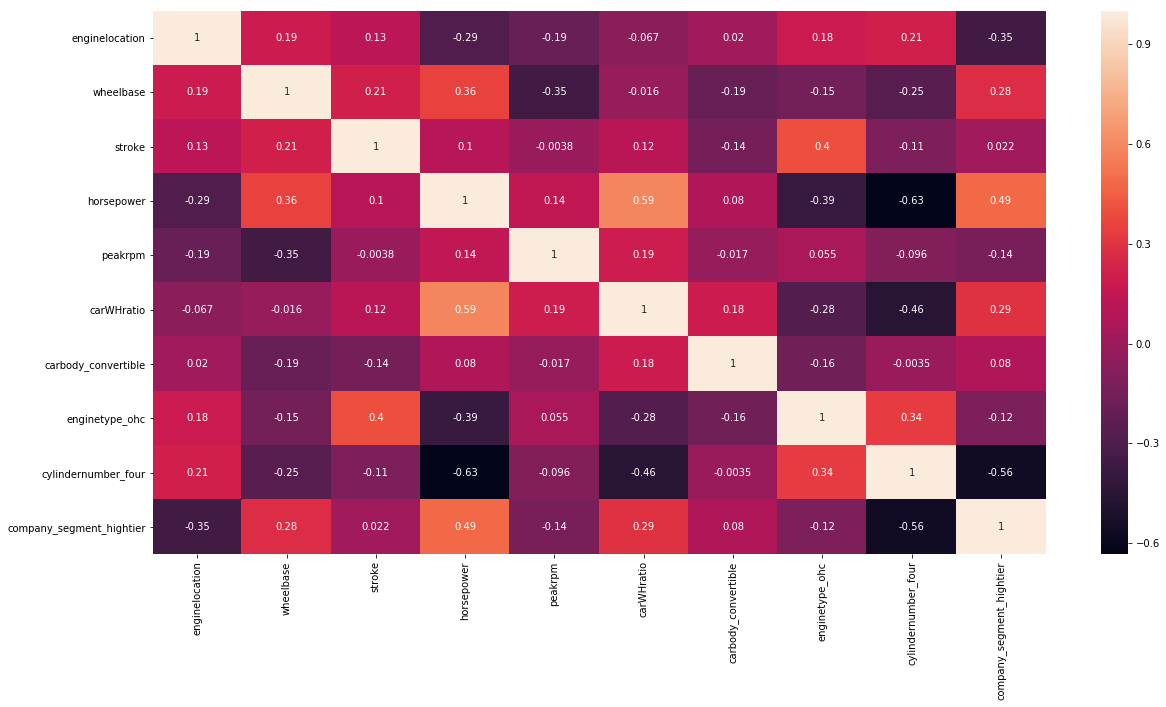

In [67]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train5.corr(),annot = True)

-  removing PWratio reduced the Adj. R-Squared to 0.926(not much)
-  peakrpm is having high p-value. Let's remove this

In [68]:
X_train6 = X_train5.drop('peakrpm', axis=1)

In [69]:
lm6=fit_LRM(X_train6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.40e-71
Time:                        20:19:16   Log-Likelihood:                 196.67
No. Observations:                 141   AIC:                            -373.3
Df Residuals:                     131   BIC:                            -343.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

-  enginetype_ohc is having p-value > 0.05, making it insignificant in the model. Let's remove this.

In [70]:
X_train7 = X_train6.drop('enginetype_ohc', axis=1)

In [71]:
lm7=fit_LRM(X_train7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     217.7
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.82e-72
Time:                        20:19:16   Log-Likelihood:                 195.12
No. Observations:                 141   AIC:                            -372.2
Df Residuals:                     132   BIC:                            -345.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

-  stroke is having p-value > 0.05 . Let's remove this.

In [72]:
X_train8 = X_train7.drop('stroke', axis=1)

In [73]:
lm8=fit_LRM(X_train8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           5.81e-73
Time:                        20:19:16   Log-Likelihood:                 194.15
No. Observations:                 141   AIC:                            -372.3
Df Residuals:                     133   BIC:                            -348.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [74]:
getVIF(X_train8)

,Features,VIF
0,enginelocation,26.46
3,carWHratio,12.55
1,wheelbase,8.74
2,horsepower,8.37
5,cylindernumber_four,6.89
6,company_segment_hightier,1.72
4,carbody_convertible,1.13


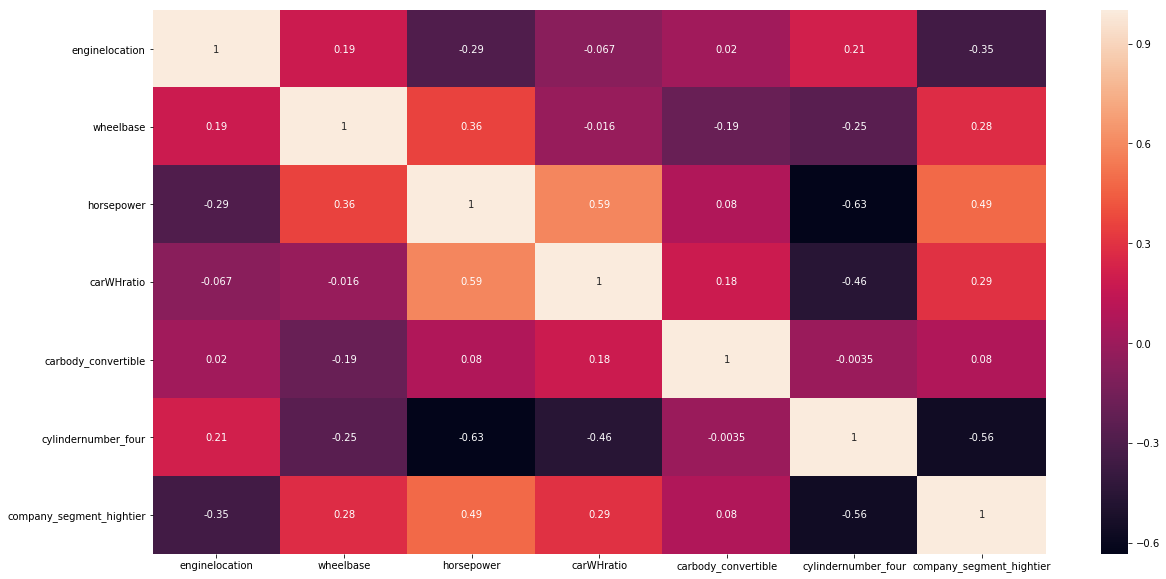

In [75]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train8.corr(),annot = True)

-  enginelocation is having the highest VIF. Let's remove this.

In [76]:
X_train9 = X_train8.drop('enginelocation', axis=1)

In [77]:
lm9=fit_LRM(X_train9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     231.4
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           3.82e-68
Time:                        20:19:17   Log-Likelihood:                 179.41
No. Observations:                 141   AIC:                            -344.8
Df Residuals:                     134   BIC:                            -324.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [78]:
getVIF(X_train9)

,Features,VIF
1,horsepower,8.35
2,carWHratio,8.05
0,wheelbase,5.76
4,cylindernumber_four,3.63
5,company_segment_hightier,1.72
3,carbody_convertible,1.13


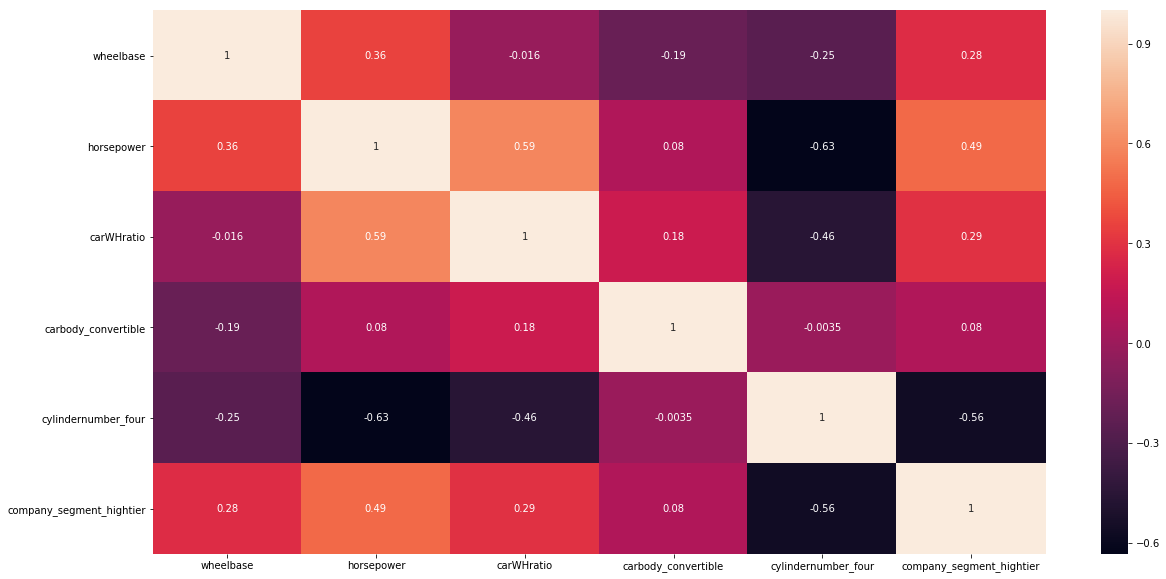

In [79]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train9.corr(),annot = True)

-  removing enginelocation lowers the Adj. R-Squared to  0.908. Still a significant fit.
-  Horsepower is more bussiness significant variable that carWHratio which also has a high VIF. carWHratio is correlated with horsepower. Let's remove carHWratio.

In [80]:
X_train10 = X_train9.drop('carWHratio', axis=1)
X_train10 = sm.add_constant(X_train10)
lm10 = sm.OLS(y_train,X_train10).fit() 
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     273.2
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           9.11e-69
Time:                        20:19:17   Log-Likelihood:                 177.91
No. Observations:                 141   AIC:                            -343.8
Df Residuals:                     135   BIC:                            -326.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [81]:
getVIF(X_train10)

,Features,VIF
0,const,19.89
4,cylindernumber_four,1.95
2,horsepower,1.89
5,company_segment_hightier,1.56
1,wheelbase,1.24
3,carbody_convertible,1.08


All the independent variable have considerably low VIF and the **Adj. R-Squared is 0.907** which is quite a significant fit. We will conclude with these variables as the final model predictor variables.

-----------

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [82]:
y_train_price = lm10.predict(X_train10)

In [83]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

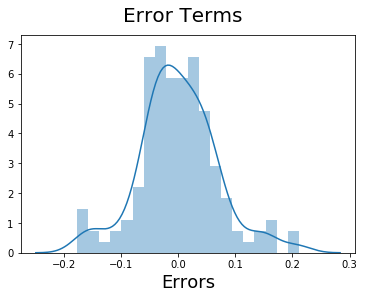

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Although not the perfect normal distribution and centered not perfectly but almost around zero. There is some error variance along the tails meaning model is still not able to explain some variance. considering the size of the train and test data this error term distribution still is almost close to a normal distribution.

**NOTE:** Another model, Model 2 was created separately with also 5 predictor features. The error distrubution was more close to a normal distribution and more centered at zero than this model, Model 1. But still we considered this model. why? more on this in the coming Model Evaluation section.

## Making Predictions
Before making any inference about the equation of the linear regression, let's test it on the test set

#### Applying the scaling on the test sets
Applying the transformation on the test set using the learning of the train set therefore we only transform.<br>
we only use those variables which we used to train the final model. So lets use only those.

In [85]:
num_vars=num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [86]:
y_test = df_test.pop('price')
X_test = df_test

In [87]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train10= X_train10.drop(['const'], axis=1)
X_test_new = X_test[X_train10.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [88]:
# Making predictions
y_pred = lm10.predict(X_test_new)

## Model Evaluation

Text(0,0.5,'y_pred')

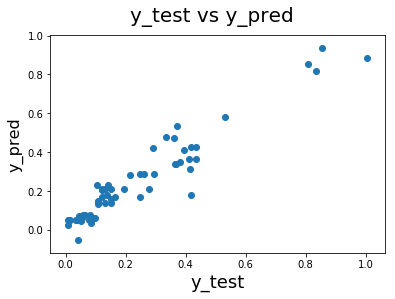

In [89]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

y_test VS y_pred is observed to be almost linear with some variataion occuring. Overall, it is a pretty linear spread.

In [90]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.06739242129331674
Model r2_score: 0.9056388935908384


r2_score on the test data is very close to the trained Adj. R-Squared value of the model. we have a significantly high r2_score and a low RMSE of 0.067.

Another model was created separately with 5 predictor features with PWratio variable inplace to horsepower. The error distrubution was more close to a normal distribution and centered at zero as below,
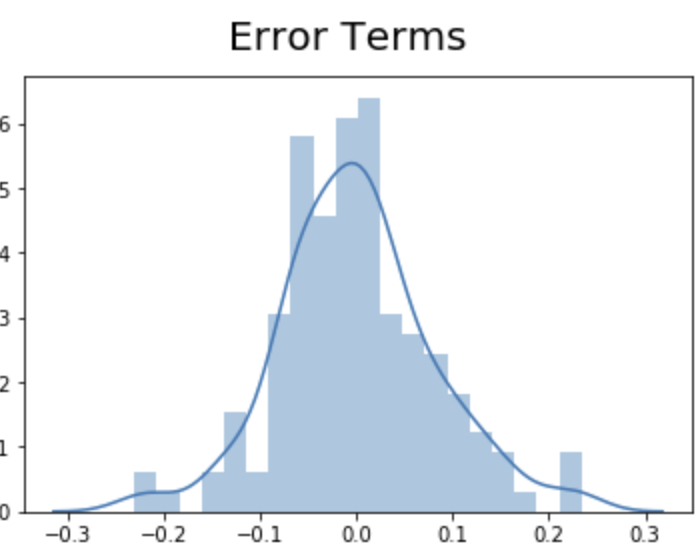

| Model No. | Adj.R-Squared | r2_score | Prob (F-statistic) | AIC | BIC | RMSE
| --- | --- | --- | --- | --- | --- | --- |
Model 1 | 0.907 | 0.905 | 9.11e-69 | -343.8 | -326.1 | 0.067
Model 2 | 0.869 | 0.892 | 6.66e-59 | -296.2 | -278.6 | 0.072

But this other model, Model 2 was compromising in the overall model fit parameters. Therefore considering the overall fit of the model and small size of data set available to train and test, we went with **selecting Model 1 with better r2_score and RMSE.**

#### FINAL INFERENCE 

Final inference from model evaluation

With a low p-value and low VIF, these variables do describe the price of the automobiles to a good extent.

Final predictors which can be proposed are

| Predictor | Coef | p-value |
| --- | --- | --- |
| wheelbase | 0.3058 | 0.000 |
| horsepower | 0.3750 | 0.000 |
| carbody_convertible | 0.1785 | 0.000 |
| cylindernumber_four | -0.0686 | 0.001 |
| company_segment_hightier | 0.3129 | 0.000 |

We can see that the equation of our best fitted line is:

**$ price = -0.0133 + 0.3058  \times  wheelbase + 0.3750 \times horsepower + 0.1785 \times carbody\_convertible - 0.0686 \times cylindernumber\_four + 0.3129 \times company\_segment\_hightier $**

This equation implies how the price of the vehical changes with a unit change in any of these independent variable with all other variables held constant.<br>For example we can say, the price of the car changes by 0.3058 for every unit change in the wheelbase dimension if all other variables are held constant. And so is true for all other variables.
<br> The predictor carbody_convertible suggest that the price of car increases by a factor of 0.1785 when the car body is convertible.
<br> The cylinder_number_four is the most commonly available feature in 77.6% of the car data in USA and since having 4 cylinder is attributed with relatively low price cars the coeffeciant for this variable is negative.
<br> The company name is also essensial in determining the price the automobile. High tier companies names like, BMW, Buik, Porsche and Jaguar further adds up to the price by a factor of 0.3129.

Overall we have a decent model, but we also acknowledge that we could do better. 

| Adj. R-squared | r2_score | Prob (F-statistic) | AIC | BIC | RMSE
| --- | --- | --- | --- | --- | --- |
| 0.907 | 0.905 | 9.11e-69 | -343.8 | -326.1 | 0.067

We have a couple of options:
1. Add new features (ground_area= carlength * carwidth, etc.)
2. choosing another set of variables to get a more normal distribution of error terms or use more useful variables like PWratio inplace of horsepower. 
3. Build a non-linear model

**Suggestions:**<br>
The chinese company  Geely Automotives entering the US market should consider the below listed points,

-  **Average US car price:**  13000 USD(approx).
For profitability and effective pricing of cars in this new market, the model's price predictors variables have to be regulated and balanced effectively to meet certain price levels and gain an edge over the other competitors.<br>
<br>
Also, keeping into account the predominating or the popular factors of a car in US market will give a better understanding of the needs and requirment of the citizens of USA.
-  **symboling:** moderate (0,1)
-  **Carbody:** Sedan
-  **fueltype:** gas
-  **aspiration:** standard
-  **doornumbers:** four
-  **drivewheel:** forward
-  **engine location:** front
-  **engine type:** ohc
-  **cylinderNumber:** four
-  **fuelSystem**: mpfi

This can be used to make the appropriate changes in design, features and the price offered to the customer.

-----------